# Welcome,

In this notebook we have tried to create a model to help us predict the medical insurance price for a person with given atributes.

we have used a dataset having following column which will help the model predict:

1.**Age**: Years the person has lived

2.**Sex** : The Gender

3.**BMI (Body Mass Index)** : Body to mass ratio

4.**Smoker** : whether one smokes or not

5.**Region** : the region the person resides

6.**Children**: No. of children the person has

7.**Charges**: How much medical insurance will cost them

Lets go ahead with the project

Importing nessecary libraries

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
warnings.filterwarnings(action='ignore')

Importing Dataset

In [203]:
df=pd.read_csv('/kaggle/input/medical-insurance-dataset/Train_Data.csv')

In [204]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


Checking basic information about the dataset

In [205]:
df.shape

(3630, 7)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [207]:
df.nunique()

age         1589
sex            2
bmi         2322
smoker         2
region         4
children       6
charges     2951
dtype: int64

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3630.0,38.887036,12.151029,18.0000,29.000000,39.170922,48.343281,64.00000
bmi,3630.0,30.629652,5.441307,15.9600,26.694526,30.200000,34.100000,53.13000
children,3630.0,2.503581,1.712568,0.0000,1.000000,3.000000,4.000000,5.00000
charges,3630.0,12784.808644,10746.166743,1121.8739,5654.818262,9443.807222,14680.407505,63770.42801


In [209]:
df.isna().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

Editing colums to make dataset model ready

In [210]:
def sex_in_digits(df,col):
    df[col]=df[col].replace({'male':1,'female':0})

In [211]:
sex_in_digits(df,'sex')

In [212]:
def smoker_digit(df,col):
    df[col]=df[col].replace({'yes':1,'no':0})

In [213]:
smoker_digit(df,'smoker')

In [214]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,northeast,2,3279.868550
1,36.976978,0,25.744165,1,southeast,3,21454.494239
2,18.000000,1,30.030000,0,southeast,1,1720.353700
3,37.000000,1,30.676891,0,northeast,3,6801.437542
4,58.000000,1,32.010000,0,southeast,1,11946.625900


We would want to check the corelation between the columns as this can help us to create accurate models.

<Axes: >

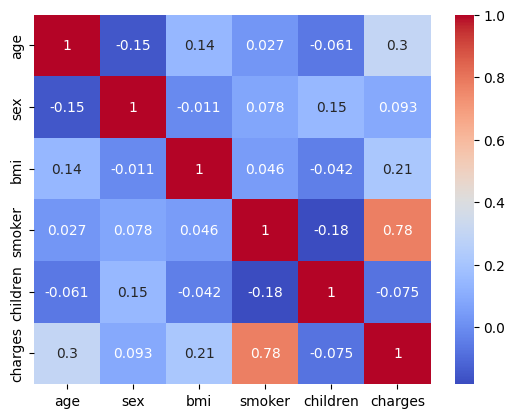

In [215]:
sns.heatmap(df.drop('region',axis=1).corr(),cmap='coolwarm',annot=True)

Being a smoker costs a lot in term of medical insurance costs

# EDA


Plotting to get region and gender distribution

Text(0.5, 1.0, 'Region-wise distribution of Gender')

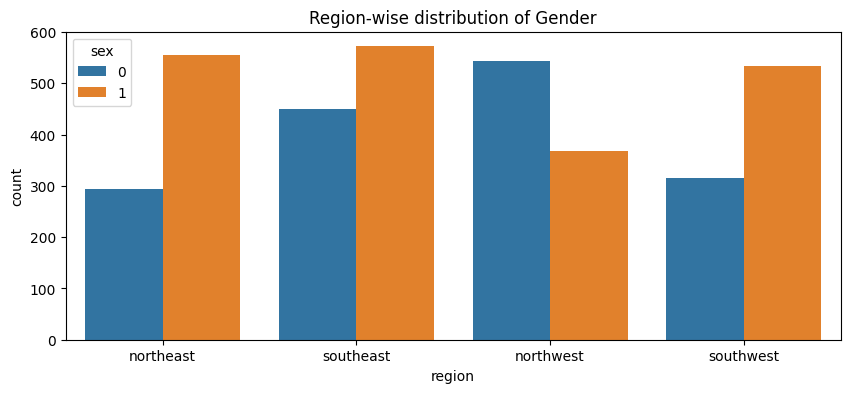

In [216]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['region'],hue=df['sex'])
plt.title('Region-wise distribution of Gender')

Plotting to get to know what age has the most density

Text(0.5, 1.0, 'Age Density of both Gender')

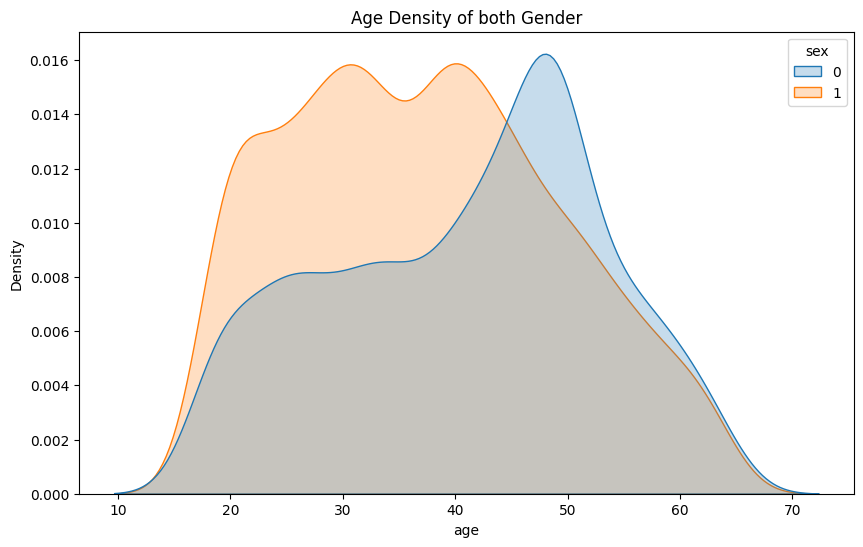

In [217]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df['age'],hue=df['sex'],fill=True)
plt.title('Age Density of both Gender')

Plotting Bmi of Smoker vs Non-Smoker

Text(0.5, 1.0, 'BMI of smoker vs Non-Smoker')

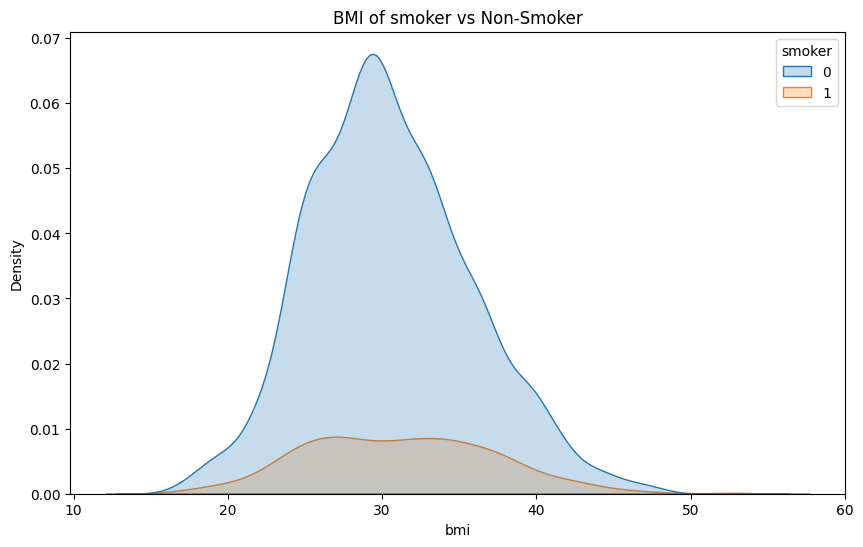

In [218]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df['bmi'],hue=df['smoker'],fill=True)
plt.title('BMI of smoker vs Non-Smoker')

Plotting a scatterplot to find trends between age and charges of medical insurance

Text(0.5, 1.0, 'Insurance charges at different age for Smoker vs Non-smoker')

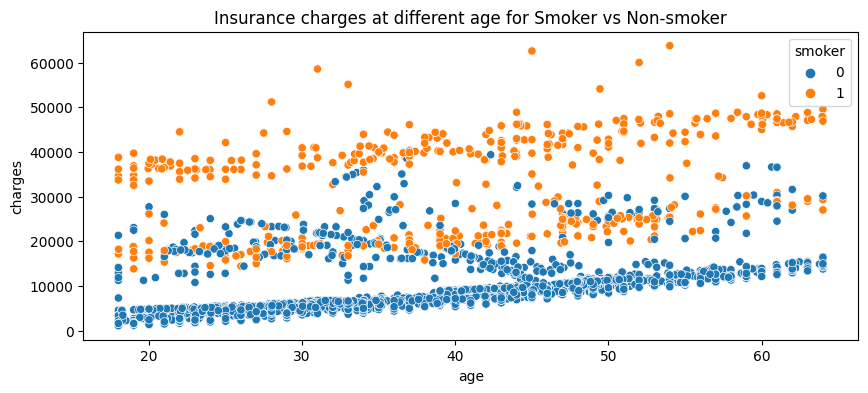

In [219]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df['age'],y=df['charges'],hue=df['smoker'])
plt.title('Insurance charges at different age for Smoker vs Non-smoker')

Plotting Average Insurance charges of People from diffrent region between smokers vs non-smokers

Text(0.5, 1.0, 'Insurance charges in different region for Smoker vs Non-smoker')

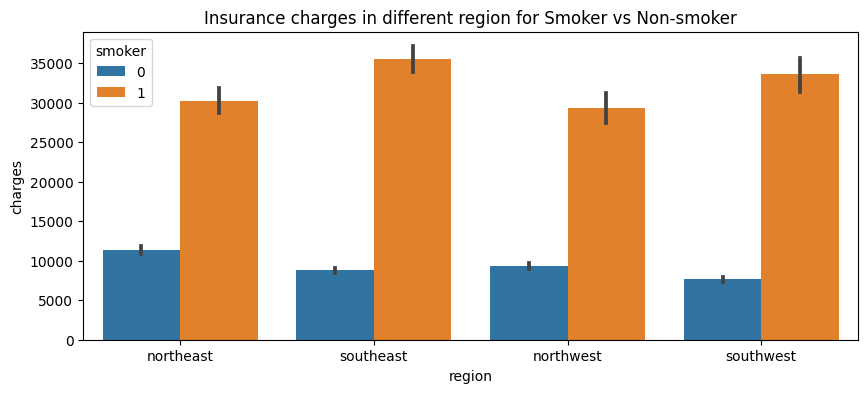

In [220]:
plt.figure(figsize=(10,4))
sns.barplot(x=df['region'],y=df['charges'],hue=df['smoker'])
plt.title('Insurance charges in different region for Smoker vs Non-smoker')

Plotting insurance charges of people with number of children they have

Text(0.5, 1.0, 'Insurance charges with pepole with childrens')

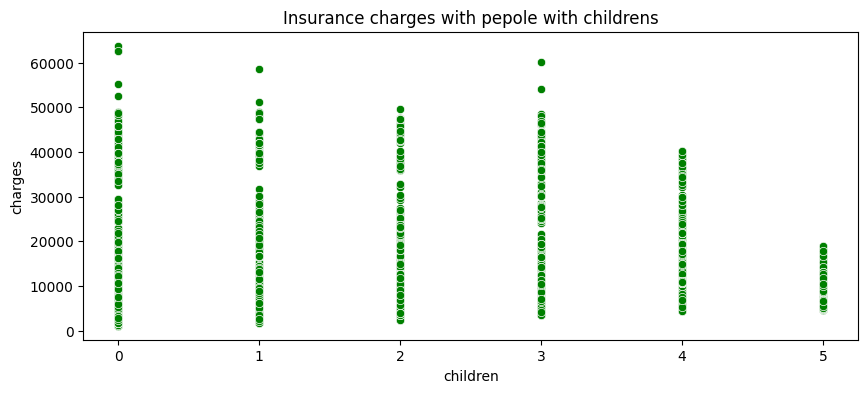

In [221]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df['children'],y=df['charges'],color='green')
plt.title('Insurance charges with pepole with childrens')

Plotting BMI againsts charges between smoker vs non-smokers.

Text(0.5, 1.0, 'Insurance price against the Bmi of Smoker vs Non-Smoker')

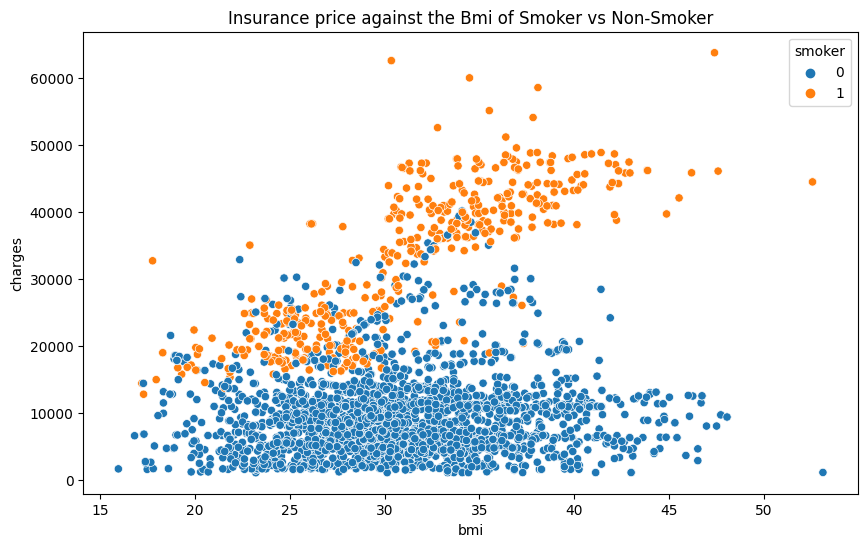

In [222]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df['smoker'])
plt.title('Insurance price against the Bmi of Smoker vs Non-Smoker')

Checking distribution of diffrent columns.

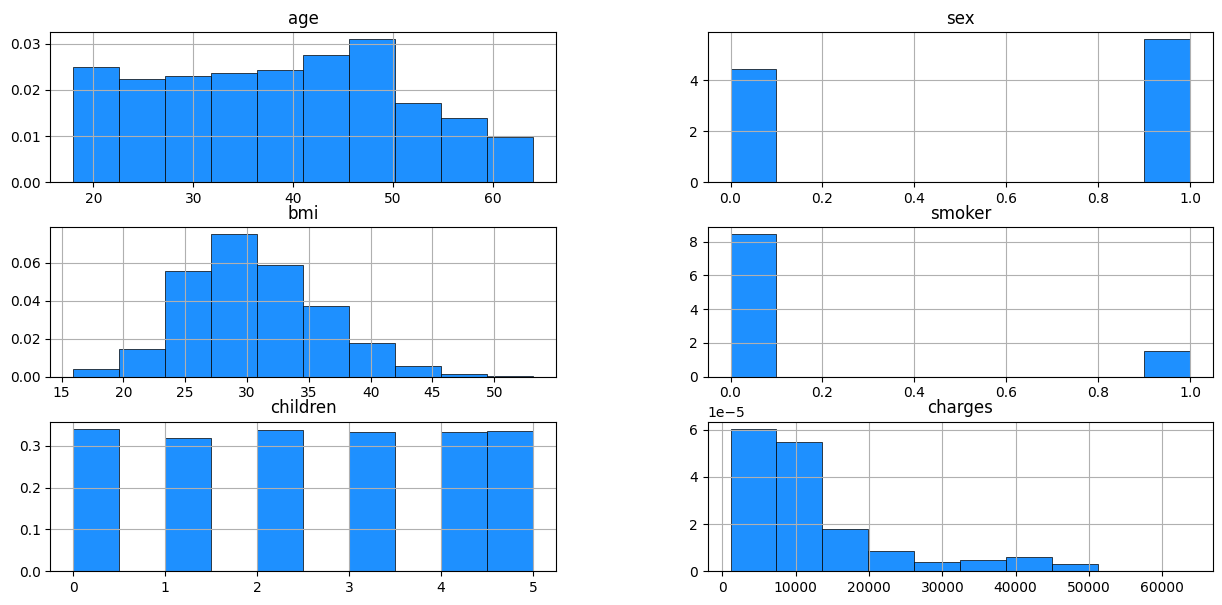

In [223]:
df.drop('region',axis=1).hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

Plotting boxplot for each columns to point out the Outliers.

age            Axes(0.125,0.11;0.0824468x0.77)
sex         Axes(0.223936,0.11;0.0824468x0.77)
bmi         Axes(0.322872,0.11;0.0824468x0.77)
smoker      Axes(0.421809,0.11;0.0824468x0.77)
children    Axes(0.520745,0.11;0.0824468x0.77)
charges     Axes(0.619681,0.11;0.0824468x0.77)
dtype: object

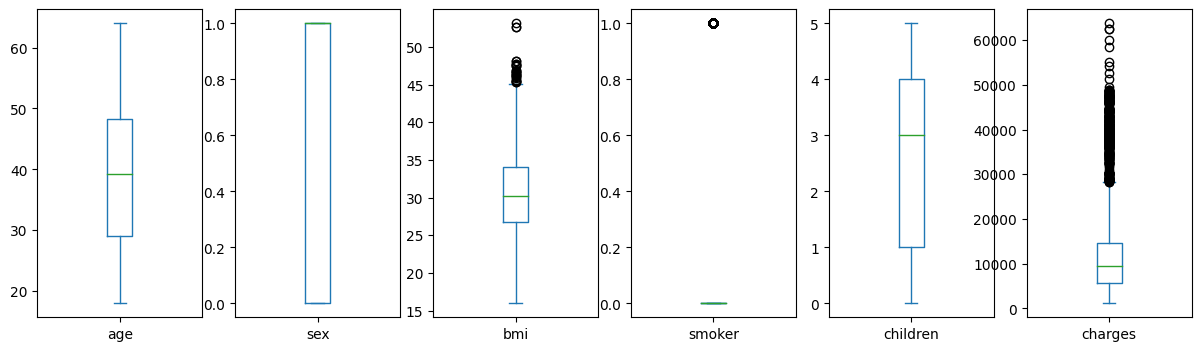

In [224]:
df.drop('region',axis=1).plot(kind='box',subplots=True,layout=(1,8),figsize=(20,4))

Using OrdinalEncoder to encode categorical data to make data ready for model.

In [225]:
encoder=OrdinalEncoder()

In [226]:
encoder.fit(pd.DataFrame(df['region']))


OrdinalEncoder()

In [227]:
def encode_region(df,col):
    df[col]=encoder.transform(pd.DataFrame(df[col]))
    

In [228]:
encode_region(df,'region')

In [229]:
x=df.drop('charges',axis=1)
y=df['charges']


Using StandardScaler to normalize data to make more accurate predictions

In [230]:
scaler=StandardScaler()

In [231]:
scaler.fit_transform(x)

array([[-1.47226215,  0.88828973, -0.89782204, -0.42709533, -1.39245786,
        -0.29409091],
       [-0.1572148 , -1.12575882, -0.89797554,  2.34139763,  0.44458449,
         0.28990799],
       [-1.71918883,  0.88828973, -0.11021893, -0.42709533,  0.44458449,
        -0.87808981],
       ...,
       [ 1.40854907,  0.88828973,  1.77745525, -0.42709533,  1.36310567,
        -1.46208871],
       [ 0.75511579, -1.12575882,  0.79053874, -0.42709533,  0.44458449,
        -0.87808981],
       [-0.106028  , -1.12575882, -0.99446043, -0.42709533, -1.39245786,
         0.28990799]])

In [232]:
x

,age,sex,bmi,smoker,region,children
0,21.000000,1,25.745000,0,0.0,2
1,36.976978,0,25.744165,1,2.0,3
2,18.000000,1,30.030000,0,2.0,1
3,37.000000,1,30.676891,0,0.0,3
4,58.000000,1,32.010000,0,2.0,1
...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1.0,4
3626,38.661977,0,26.202557,0,2.0,2
3627,56.000000,1,40.300000,0,3.0,0
3628,48.061207,0,34.930624,0,2.0,1


In [233]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

Importing more libraries from scikit learn

In [234]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import math

In [235]:
regression_models = [AdaBoostRegressor(),
                     GradientBoostingRegressor(),
                     XGBRegressor(),
                     LGBMRegressor(),
                     LinearRegression(),
                     RandomForestRegressor(),
                     KNeighborsRegressor(),
                     SVR()]

Creating fucntion to get the model which will create more accurate prediction.

In [236]:
def reg(i,x_train,y_train,x_test,y_test):
    reg=i
    reg.fit(x_train,y_train)
    pred=reg.predict(x_test)
    print('='*35)
    print(i)
    print('-'*35)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    print('R2 Score',r2)
    print('Mean Squared Error',mse)
    print('RSME',math.sqrt(mse))
    print('-'*35)
    print('='*35)

Using the function to get the best models.

In [237]:
for i in regression_models:
    reg(i,x_train,y_train,x_test,y_test)

AdaBoostRegressor()
-----------------------------------
R2 Score 0.6601540301580756
Mean Squared Error 34998194.601332776
RSME 5915.927197095378
-----------------------------------
GradientBoostingRegressor()
-----------------------------------
R2 Score 0.8754890906297909
Mean Squared Error 12822447.293267613
RSME 3580.844494426924
-----------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
          

We will use gridSearchCV to fine tune our model.

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
param_grid={'n_estimators':[10,50,100],
      'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10]}

In [240]:
grid=GridSearchCV(model,param_grid,cv=5)

In [241]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

After fitting the grid we will extract the best parameters and use that in our model.

In [242]:
grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Creating model with the best parameters we found from the grid.

In [243]:
model=RandomForestRegressor(max_depth= None, min_samples_split= 2, n_estimators= 100)

Fitting the model.

In [244]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [245]:
pred=model.predict(x_test)

Getting the r2_score.

In [246]:
print(r2_score(y_test,pred))

0.9101297714586761


Testing our above model on data which we have kept seperate from the model.

In [247]:
test=pd.read_csv('/kaggle/input/medical-insurance-dataset/Test_Data.csv')

In [248]:
sex_in_digits(test,'sex')
test

,age,sex,bmi,smoker,region,children
0,40.000000,1,29.900000,no,southwest,2
1,47.000000,1,32.300000,no,southwest,1
2,54.000000,0,28.880000,no,northeast,2
3,37.000000,1,30.568094,no,northeast,3
4,59.130049,1,33.132854,yes,northeast,4
...,...,...,...,...,...,...
487,51.000000,1,27.740000,no,northeast,1
488,33.000000,1,42.400000,no,southwest,5
489,47.769999,1,29.064615,no,northeast,4
490,41.530738,0,24.260852,no,southeast,5


We need to work upon the dataset to make it ready to feed it to model.

In [249]:
smoker_digit(test,'smoker')

In [250]:
encode_region(test,'region')

Nomalizing the data with the same scaler model which we used upon the new dataset.

In [251]:
scaler.transform(test)

array([[ 0.0916068 ,  0.88828973, -0.13411354, -0.42709533,  1.36310567,
        -0.29409091],
       [ 0.66776904,  0.88828973,  0.30701772, -0.42709533,  1.36310567,
        -0.87808981],
       [ 1.24393128, -1.12575882, -0.32159433, -0.42709533, -1.39245786,
        -0.29409091],
       ...,
       [ 0.7311468 ,  0.88828973, -0.28766127, -0.42709533, -1.39245786,
         0.8739069 ],
       [ 0.21760014, -1.12575882, -1.17061538, -0.42709533,  0.44458449,
         1.4579058 ],
       [-0.23762877,  0.88828973,  0.50920288,  2.34139763,  1.36310567,
        -0.29409091]])

Predicting the external data

In [254]:
test['Predicted_price']=grid.predict(test)

Putting it in the table to know the price which we have predicted.

In [255]:
test

,age,sex,bmi,smoker,region,children,Predicted_price
0,40.000000,1,29.900000,0,3.0,2,7050.539157
1,47.000000,1,32.300000,0,3.0,1,8624.301156
2,54.000000,0,28.880000,0,0.0,2,13359.181755
3,37.000000,1,30.568094,0,0.0,3,6957.682246
4,59.130049,1,33.132854,1,0.0,4,42373.405128
...,...,...,...,...,...,...,...
487,51.000000,1,27.740000,0,0.0,1,14394.042154
488,33.000000,1,42.400000,0,3.0,5,6785.798795
489,47.769999,1,29.064615,0,0.0,4,12520.841769
490,41.530738,0,24.260852,0,2.0,5,9332.128971


# Thank You